In [2]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv('Downloads/Dataset/Veriseti.csv')
#check data has been read in properly
train_df.head()

,Type,Autocorrelation,Contrast,Correlation,ClusterProminence,ClusterShade,Dissimilarity,Energy,Entropy,Homogeneity,MaximumProbability,Variance,Kurtosis,Skewness,Mean,StandartDeviation,RMS
0,1,4.854814,0.182667,0.945454,211.385247,26.411996,0.135570,0.425349,1.535685,0.938705,0.635355,4.889867,4.003269,1.344533,32.611042,47.105240,10.050342
1,1,3.276670,0.114522,0.942021,161.956366,19.688291,0.086642,0.476887,1.245438,0.960666,0.658931,3.286307,7.513100,1.968529,24.393337,37.242781,9.766383
2,1,4.814982,0.175214,0.943163,156.388801,20.823589,0.141368,0.384039,1.608861,0.934307,0.598212,4.845540,3.656900,1.208342,33.584270,44.876064,10.599269
3,1,5.304841,0.172112,0.949841,194.125504,23.646399,0.134229,0.371940,1.622887,0.938532,0.579090,5.331232,3.564394,1.144827,36.362152,47.390626,10.686207
4,1,4.814698,0.155377,0.944951,127.991536,16.712057,0.124962,0.352423,1.610988,0.941825,0.557698,4.834325,3.442860,1.052722,34.836880,43.428109,10.892309


In [3]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['Type'])

#check that the target variable has been removed
train_X.head()

,Autocorrelation,Contrast,Correlation,ClusterProminence,ClusterShade,Dissimilarity,Energy,Entropy,Homogeneity,MaximumProbability,Variance,Kurtosis,Skewness,Mean,StandartDeviation,RMS
0,4.854814,0.182667,0.945454,211.385247,26.411996,0.135570,0.425349,1.535685,0.938705,0.635355,4.889867,4.003269,1.344533,32.611042,47.105240,10.050342
1,3.276670,0.114522,0.942021,161.956366,19.688291,0.086642,0.476887,1.245438,0.960666,0.658931,3.286307,7.513100,1.968529,24.393337,37.242781,9.766383
2,4.814982,0.175214,0.943163,156.388801,20.823589,0.141368,0.384039,1.608861,0.934307,0.598212,4.845540,3.656900,1.208342,33.584270,44.876064,10.599269
3,5.304841,0.172112,0.949841,194.125504,23.646399,0.134229,0.371940,1.622887,0.938532,0.579090,5.331232,3.564394,1.144827,36.362152,47.390626,10.686207
4,4.814698,0.155377,0.944951,127.991536,16.712057,0.124962,0.352423,1.610988,0.941825,0.557698,4.834325,3.442860,1.052722,34.836880,43.428109,10.892309


In [4]:
#create a dataframe with only the target column
train_y = train_df[['Type']]

#view dataframe
train_y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [5]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.15,shuffle=True,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2591, 16) (2591, 1)
(458, 16) (458, 1)


In [6]:
train_X.shape

(3049, 16)

In [10]:
import numpy as np
train_labels_flat = y_train.values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Tümör sayısı: %d'%train_labels_count)

Tümör sayısı: 3


In [11]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [12]:
y_train = dense_to_one_hot(train_labels_flat-1, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)

(2591, 3)


In [13]:
train_labels_flat = y_test.values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]

In [14]:
y_test = dense_to_one_hot(train_labels_flat-1, train_labels_count)
y_test = y_test.astype(np.uint8)

print(y_test.shape)

(458, 3)


In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers

model.add(Dense(16, input_shape=(n_cols,)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
model.summary()

C:\Users\ergin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 153       
_________________________________________________________________
activation_2 (Activation)    (None, 9)                 0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 9)                 36        
__________

In [16]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath='Downloads/Keras/BreastImageClassification.h5', verbose=1, save_best_only=True)

#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=3)
#train model
history =model.fit(X_train, 
                y_train,
                validation_data=(X_test, y_test),
                batch_size=16, 
                shuffle=True,
                verbose=1,
                epochs=5)




Train on 2591 samples, validate on 458 samples
Epoch 1/5
2591/2591 [==============================] - 6s 2ms/step - loss: 1.4957 - acc: 0.3524 - val_loss: 1.0947 - val_acc: 0.4520
Epoch 2/5
2591/2591 [==============================] - 2s 597us/step - loss: 1.2035 - acc: 0.4357 - val_loss: 1.0333 - val_acc: 0.4782
Epoch 3/5
2591/2591 [==============================] - 2s 588us/step - loss: 1.1055 - acc: 0.4581 - val_loss: 1.0098 - val_acc: 0.4716
Epoch 4/5
2591/2591 [==============================] - 1s 551us/step - loss: 1.0489 - acc: 0.4921 - val_loss: 0.9941 - val_acc: 0.4978
Epoch 5/5
2591/2591 [==============================] - 1s 516us/step - loss: 1.0257 - acc: 0.5187 - val_loss: 0.9950 - val_acc: 0.4869


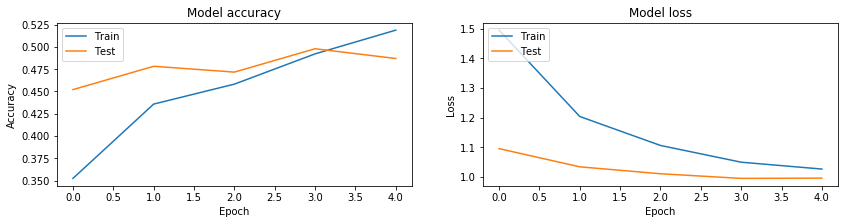

In [21]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
results = model.predict(X_test.iloc[1:2])
print(y_test[:1])

[[1 0 0]]


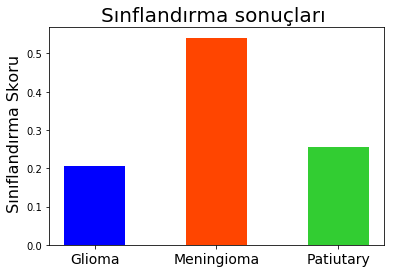

Tahmin sonucu: Meningioma
Gerçek sonuç: Meningioma


In [20]:
results = model.predict(X_test.iloc[1:2])

#sınıflarımız, 3 adet tümeör türü var
class_names = ['Glioma', 'Meningioma', 'Patiutary']

ind = 0.1+0.3*np.arange(len(class_names))
width = 0.15  #bar genişliği

color_list = ['blue','orangered','limegreen']

#sonuçlarımızı renklendirelim
for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])
  
plt.title("Sınflandırma sonuçları ",fontsize=20)
plt.ylabel(" Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=0, fontsize=14)
plt.show()

print("Tahmin sonucu:", class_names[np.argmax(results)])
print("Gerçek sonuç:",class_names[np.argmax(y_test[1:2])])